<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/BWE_22092021_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

standardized data...
Processing step 1: Lower Case, Removed Https tag, Removed Stopwords
CPU times: user 2.24 ms, sys: 26 µs, total: 2.27 ms
Wall time: 2.1 ms
CPU times: user 1.67 ms, sys: 1.99 ms, total: 3.66 ms
Wall time: 3.55 ms
CPU times: user 1.57 ms, sys: 0 ns, total: 1.57 ms
Wall time: 1.43 ms
Done
Processing step 3: Tokenize
Processing step 4: POS Tagging
Processing step 5: Entity Regconize
Processing step 6: Vectorize PhoBERT
Process model SVM....
>>> Done


## **Phân tích người tham gia bình luận**

Ý nghĩa của biểu đồ: Biểu diễn bằng chart violin, quan sát mật độ phân phối số lượng bình luận của các user
*   Xác định có vấn đề seeding bình luận ảo không
*   Xác định nhóm người theo sentiment



Số bình luận =  359 . Số người tham gia bình luận =  202 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot số lượng comment của người tham gia bình luận')

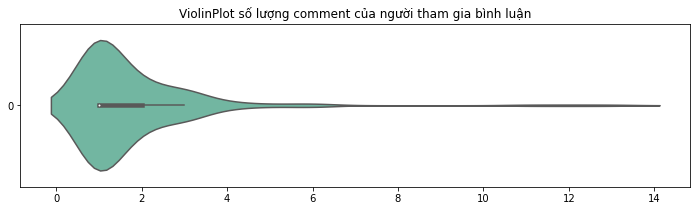

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('Số bình luận = ',len(data),'. Số người tham gia bình luận = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot số lượng comment của người tham gia bình luận')

# **Visualize Sentiment Analysis**

Ý nghĩa của biểu đồ: Biểu diễn số lượng bình luận tích cực / tiêu cực / trung tính theo khung thời gian.
* Positive Comment: Bình luận được máy nhận diện là tích cực
* Negative Comment: Bình luận được máy nhận diện là tiêu cực
* Neutral Comment: Bình luận được máy nhận diện là không có trạng thái cảm xúc (hoặc máy không nhận diện được)

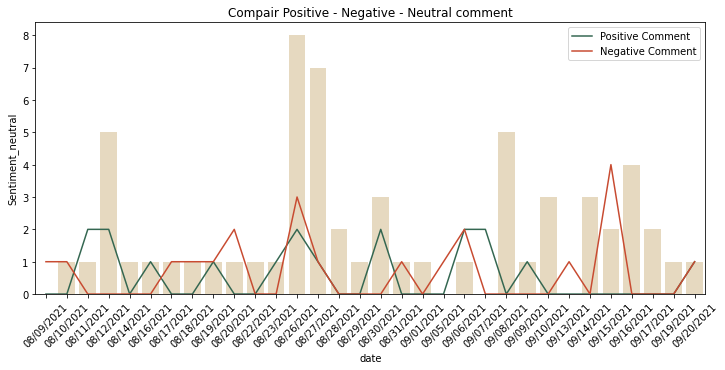

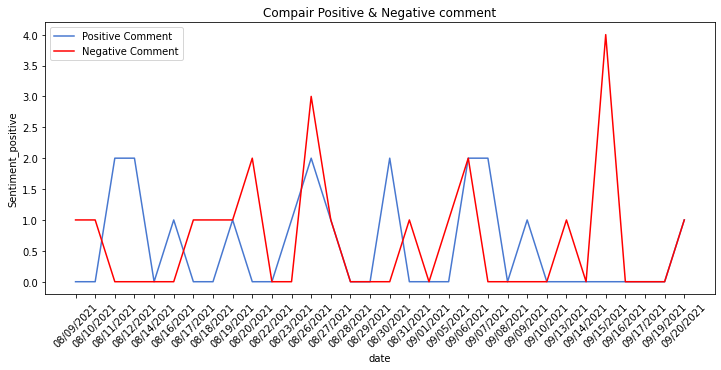

# **Visualize Topic Cluster**

Ý nghĩa biểu đồ: Phân loại comment theo 4 nhóm: Cơ bản / Kĩ thuật / Vĩ mô / Tin đồn. Và nhận diện cảm xúc (tích cực / tiêu cực) trên từng loại topic

Text(0.5, 1.0, 'Topic Tin đồn')

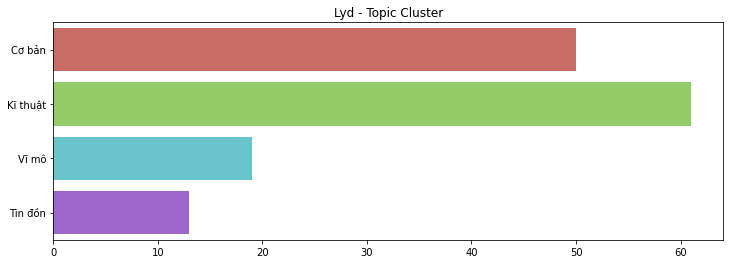

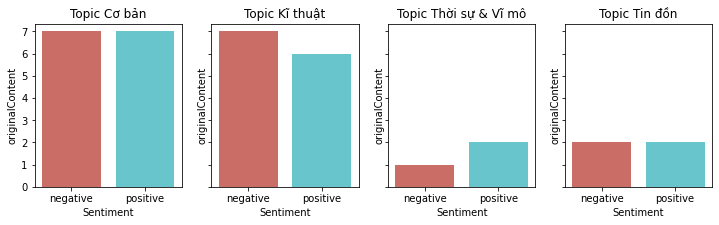

Số comment cơ bản =  50 . Số người tham gia comment =  35
Số comment kĩ thuật =  61 . Số người tham gia comment =  49
Số comment thời sự & vĩ mô =  19 . Số người tham gia comment =  18
Số comment tin đồn =  13 . Số người tham gia comment =  11


## **Graph Knowledge**

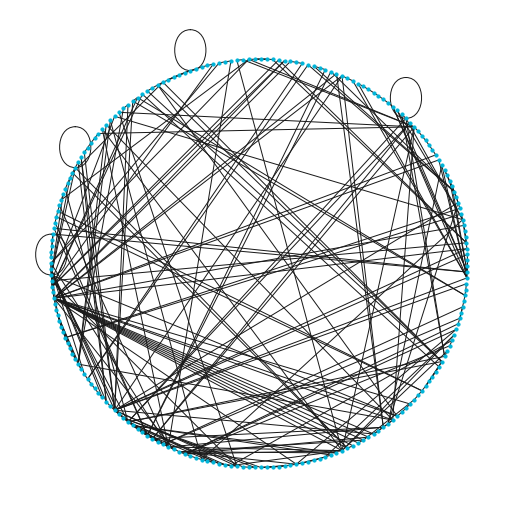

In [ ]:
#@title Process Tin đồn
url = 'https://github.com/cafechungkhoan/chu_gia/blob/master/1_gram_keyword.xlsx?raw=true'
stop_words = pd.read_excel(url)
stop_words = stop_words['keyword'].to_list()
tin_don_graph['Content_Tokenize'] = tin_don_graph['Content_Tokenize'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))

text = " ".join(title for title in tin_don_graph.Content_Tokenize)
import nltk, re, string, collections
from nltk.util import ngrams

def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]
a = get_ngrams(text,2)

keyword = pd.DataFrame(a,columns=['keyword'])
keyword[['from', 'to']] = keyword['keyword'].str.split(' ', n=1, expand=True)
keyword = keyword.drop(['keyword'],axis = 1)

import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(keyword, 'from', 'to')
from matplotlib.pyplot import figure
figure(figsize=(7, 7))
nx.draw_shell(G, with_labels=False, node_size=10, node_color='#00b4d9') 

## **Text Summarization (tin đồn) using BERT**

In [ ]:
tin_don_show = tin_don.drop(['Content_Processed','Sentiment','Content_Tokenize'], axis = 1)
tin_don_show

,index,originalContent,date,user.name,Content_Tokenize,Text_Summarize
0,0,"Khuyến nghị SZE giá 16. Giá mục tiêu 30\n\nThời gian gần đây, các lãnh đạo SZE đã đẩy mạnh gom mua cổ phiếu. Trong đó cha của bà Trần Võ Hoài Hương, Kế toán trưởng đã mua vào 55.141 cổ phần, Chủ tịch Hội đồng quản trị (HĐQT) Bạch Văn Hiền liên tiếp mua vào 71.966 cổ phần, thành viên HĐQT Trần Anh Dũng mua vào 184.600 cổ phần và cách đây 1 tháng vợ ông Dũng tiếp tục mua vào 1.190.000 cổ phần.\nSZE có 30 triệu cp. độc quyền sở hữu nghĩa trang nhân dân TP biên hòa . Và thu gom rác Covid ở ĐN\nSZE Mô hình kinh doanh gần giống BWE. Thị trường BWE ở Bình Dương, SZE ở thị trường Đồng Nai",09/20/2021,Lữ Hành,khuyến_nghị sze mục_tiêu thời_gian lãnh_đạo sze đẩy_mạnh cổ_phiếu kế_toán_trưởng 55141 cổ_phần chủ_tịch hội_đồng_quản_trị văn_hiền liên_tiếp 71966 cổ_phần thành_viên anh_dũng 184600 cổ_phần tiếp_tục 1190000 cổ_phần sze độc_quyền sở_hữu nghĩa_trang nhân_dân thu_gom đn sze mô_hình kinh_doanh thị_trường bình_dương sze thị_trường,"Khuyến nghị SZE giá 16. Trong đó cha của bà Trần Võ Hoài Hương, Kế toán trưởng đã mua vào 55.141 cổ phần, Chủ tịch Hội đồng quản trị (HĐQT) Bạch Văn Hiền liên tiếp mua vào 71.966 cổ phần, thành viên HĐQT Trần Anh Dũng mua vào 184.600 cổ phần và cách đây 1 tháng vợ ông Dũng tiếp tục mua vào 1.190.000 cổ phần."
1,20,"CÔNG THỨC MUA CHỨNG KHOÁN CHO HỌC SINH CẤP 1 CỦA PETER LYNCH\n\nChắc anh chị biết đến Peter Lynch và câu chuyện của ổng rồi. Tóm tắt là Lynch được đề nghị dạy cho các học sinh cấp 1 cách đầu tư chứng khoán. Tất nhiên học sinh cấp 1 thì không biết cách đọc báo cáo tài chính, không biết tình hình giá hàng hóa thế giới, không biết cập nhật hành động mới nhất của Fed. Lynch đến trường đó 1 buổi và dạy đám học sinh phải làm gì từng bước một. Các bé được mở tài khoản chứng khoán và cùng nhau nghiên cứu mua cp theo cách được dạy. Kết quả là sau 1 năm, tài khoản đó tăng tốt hơn gấp đôi chỉ số thị trường chung và đánh bại hầu hết các quỹ chủ động ở phố Wall thời đó. Dưới đây là công thức được chia sẻ trên diễn đàn Stockaholic, chưa được xác nhận chính thống nhưng là chia sẻ hợp lý nhất mà đến giờ em tìm được.\n\nĐiểm mạnh của phương pháp này là đơn giản đến mức trẻ con cũng làm được. Điểm yếu là nó vô cùng nhàm chán, và nghe có vẻ không được chuyên gia lắm. Vì đám học sinh sẽ chỉ làm việc 4 lần 1 năm, sau mỗi kỳ báo cáo tài chính. Chúng sẽ cần tìm một danh mục 10 cổ phiếu thuộc 10 ngành khác nhau (tất nhiên cổ phiếu nào thuộc ngành nào đã được hỗ trợ chia trước đó). Nhiêm vụ của chúng là tìm ra cổ phiếu có tỷ lệ ROE/PE cao nhất của mỗi ngành. Mua 10 cp đó và đợi đến đợt báo cáo tài chính tiếp theo, giữ lại những cổ phiếu vẫn đạt tiêu chí ; thay thế những mã kém bằng mã mới cùng ngành, với tiêu chí vẫn như cũ là ROE/ PE cao hơn và cao nhất thời điểm đó\n\nĐem câu chuyện trên áp dùng về thị trường Việt Nam, em có thêm 2 tiêu chí:\nKhối lượng trung bình lớn hơn 200k để loại đi cp thanh khoản thấp\nP/E > 5 để loại đi cổ phiếu có lợi nhuận đột biến không bền vững\nCông thêm tiêu chuẩn giữ nguyên là cổ phiếu có ROE/PE cao nhất\nVà với 10 ngành lần lượt là Dầu khí, Vật liệu cơ bản, Công nghiệp, Tiêu dùng, Y tế, Bán lẻ, Dịch vụ hạ tầng, Chứng khoán, Ngân hàng, Bất động sản. Ta có một danh mục như em tag bên dưới, các cổ phiếu này theo như phương pháp trên thì đã được mua vào ngày 1/8 sau khi có báo cáo tài chính số hóa và sẽ được đem ra cân đối vào ngày 1/11. Đến hiện tại thì cách này luôn cho kết quả rất tốt. Danh mục của quý 3 bên dưới có 9/10 cp tăng tốt trừ mỗi ACB. Thực ra có vẻ như phương pháp này không work tốt với nhóm tài chính\n",09/10/2021,Hoàng Anh Alex,công_thức chứng_khoán học_sinh peter lynch anh_chị peter lynch câu_chuyện tóm_tắt lynch đề_nghị học_sinh đầu_tư chứng_khoán tất_nhiên học_sinh báo_cáo tài_chính tình_hình hàng_hóa thế_giới cập_nhật hành_động lynch học_sinh tài_khoản chứng_khoán nghiên_cứu kết_quả tài_khoản chỉ_số thị_trường đánh_bại hầu_hết chủ_động công_thức chia_sẻ diễn_đàn stockaholic xác_nhận chính_thống chia

## **Graph Knowledge tin_don**

# **Chi tiết 1000 comment gần nhất**

In [ ]:
data2 = data
data2 = data.drop(['Content_Processed','Sentiment','Content_Tokenize','topic_cluster'] , axis = 1)
data2

,originalContent,date,user.name
0,"Khuyến nghị SZE giá 16. Giá mục tiêu 30\n\nThời gian gần đây, các lãnh đạo SZE đã đẩy mạnh gom mua cổ phiếu. Trong đó cha của bà Trần Võ Hoài Hương, Kế toán trưởng đã mua vào 55.141 cổ phần, Chủ tịch Hội đồng quản trị (HĐQT) Bạch Văn Hiền liên tiếp mua vào 71.966 cổ phần, thành viên HĐQT Trần Anh Dũng mua vào 184.600 cổ phần và cách đây 1 tháng vợ ông Dũng tiếp tục mua vào 1.190.000 cổ phần.\nSZE có 30 triệu cp. độc quyền sở hữu nghĩa trang nhân dân TP biên hòa . Và thu gom rác Covid ở ĐN\nSZE Mô hình kinh doanh gần giống BWE. Thị trường BWE ở Bình Dương, SZE ở thị trường Đồng Nai",09/20/2021,Lữ Hành
1,Con này ì ạch thật,09/20/2021,Nguyễn Đức Thuận
2,BWE bữa giờ sao thanh khoản yếu xìu vậy m.n ☹️,09/20/2021,Phan Thảo
3,BD 1. 20/09,09/19/2021,Cát Phương
4,Hôm nay tây lông k múc nữa ta,09/17/2021,F0 Chính Hiệu
5,"Bận cviec bên cty môi trường nên 1 tuần ngó đôi ba lần thôi, FA tốt cứ hold sợ gì.\nSếp mình bảo hết dịch vào bình dương thăm quy mô của Biwase 1 chuyến để về còn làm, anh em tự hiểu nhé",09/17/2021,Yêu cầu SSC và MOF phản hồi nhà đầu tư
6,"Với tiềm lực về tài chính vô tận, với kiến thức phân tích đánh giá doanh nghiệp thượng thừa và các mối quan hệ sâu rộng. \n=> Các anh Khối ngoại có thể nhìn thấy thị giá của em nó còn quá nhỏ so với giá trị doanh nghiệp => các anh cứ miệt mài múc dù tăng dù giảm, các anh đỡ rất tốt, ai bán các anh múc hết không sót cổ nào. \nCó khi nào a gom hết cp vãng lai để tăng sở hữu có quyền phủ quyết không nhỉ.",09/16/2021,TrangPham
7,"Hôm qua mình có đăng bài về BWE có ai nghe mình khuyên thì đã k mất hàng rồi, cứ đè giá đỏ lè 38.x gãy hỗ trợ này nọ bán cho Tây nó húp nay giá 41 đó k bán đi. Nên rút kinh nghiệm k đầu tư mấy e phòng thủ dạng này nếu k chịu được nhiệt nhé",09/16/2021,Rebel
8,Tây ơi lòm tiếp vài lệnh nữa đi,09/16/2021,F0 Chính Hiệu
9,"DNW - Cty CP Cấp nước Đồng Nai\nAi theo dõi cổ phiếu này đều thấy rõ dòng tiền đang chú ý đến nó, 1 tháng trước 1 lệnh 1000-2000cp, giờ có những lệnh 10k, 15k / lệnh. DNW cp đa số tổ chức nắm, nên thanh khoản thấp,hiện tại thanh khoản đang cải thiện, nhưng dễ kéo giá lên. Giá vài tháng tới chắc bằng TDM luôn.\nP/s: 20/9 DNW chốt chia cổ tức 10% tiền mặt\n",09/16/2021,Không là gì
